In [699]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy.stats import shapiro

### a)

In [700]:
class RandomGenerator:
    def __init__(self, x0=1):
        self.x = x0  
        self.a = 45438   
        self.c = 34 
        self.m = 778784

    def losowa(self):
        self.x = (self.a * self.x + self.c) % self.m
        return (self.x / self.m) * 2 - 1

    def generuj(self, n):
        return self.na_normalne([self.losowa() for _ in range(n)])
    
    def na_normalne(self, wartosci_jednolite):
        wartosci_jednolite_skalowane = abs(np.array(wartosci_jednolite))
        
        u1 = wartosci_jednolite_skalowane[::2]  
        u2 = wartosci_jednolite_skalowane[1::2] 
        
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

        srednia = 0.5
        odch_std = 0.5
        x0 = srednia + odch_std * z0
        x1 = srednia + odch_std * z1

        wynik = np.concatenate((x0, x1))
        
        return wynik



### b)

In [701]:
generator = RandomGenerator()

ciag_20 = generator.generuj(20)
ciag_100 = generator.generuj(100)

### c)

In [702]:
wartości = [ "Średnia",
        "Mediana",
        "Moda",
        "Odchylenie standardowe",
        "Wariancja",
        "Skośność",
        "Kurtoza",
        "Pierwszy Kwantyl"]

def podaj_wartości_statystyczne(seq):
     
    return {
        
        "Średnia": np.mean(seq),
        "Mediana": np.median(seq),
        "Moda": statistics.mode(seq) if len(set(seq)) < len(seq) else "ND", # W przypadku tego zadania zwykle kazda wartość jest modą, bo sznasa na powtórzenie się liczb jest bardzo mała
        "Odchylenie standardowe": np.std(seq, ddof=1),
        "Wariancja": np.var(seq, ddof=1),
        "Skośność": stats.skew(seq),
        "Kurtoza": stats.kurtosis(seq),
        "Pierwszy Kwantyl": np.percentile(seq, 25)
        
    }

In [703]:
statystyki_rozkładu_normalnego = {
    "Średnia": 0.5,
    "Mediana": 0.5,
    "Moda": 0.5,
    "Odchylenie standardowe": 0.5,
    "Wariancja": 0.25,
    "Skośność": 0,
    "Kurtoza": 3,
    "Pierwszy Kwantyl": 0.16275
}


lab3_ciag_15 = np.random.normal(0.5, 0.5, 15)
lab3_ciag_120 = np.random.normal(0.5, 0.5, 120)

statystyki_20 = podaj_wartości_statystyczne(ciag_20)
statystyki_100 = podaj_wartości_statystyczne(ciag_100)
lab3_statystyi_15 = podaj_wartości_statystyczne(lab3_ciag_15)
lab3_statystyki_120 = podaj_wartości_statystyczne(lab3_ciag_120)

In [704]:
lab3_statystyki_120 = podaj_wartości_statystyczne(lab3_ciag_120)
statystyki_df = pd.DataFrame([statystyki_20, statystyki_100,lab3_statystyi_15,lab3_statystyki_120,statystyki_rozkładu_normalnego], index=['Ciąg 20', 'Ciąg 100', 'Lab3 Ciąg 15','Lab3 Ciąg 120',"Rozkład Normalny"])
statystyki_df

,Średnia,Mediana,Moda,Odchylenie standardowe,Wariancja,Skośność,Kurtoza,Pierwszy Kwantyl
Ciąg 20,0.416846,0.494868,ND,0.479817,0.230224,-0.125315,-0.744762,0.036393
Ciąg 100,0.505438,0.513426,ND,0.480172,0.230565,-0.343716,0.293867,0.248712
Lab3 Ciąg 15,0.526593,0.462447,ND,0.442665,0.195953,-0.253647,-0.730249,0.294977
Lab3 Ciąg 120,0.484913,0.486420,ND,0.458210,0.209956,0.022340,-0.378052,0.139130
Rozkład Normalny,0.500000,0.500000,0.5,0.500000,0.250000,0.000000,3.000000,0.162750


Łatwo zauważyć, że dla większych prób statystyki są znacznie bliższe rozkładowi normalnemu.

Ze względu na użytą metodę generowania liczb pseudolosowych w laboratorium nr 5, odchylenie standardowe i wariancja są znacząco  zbliżone do rozkładu normalnego dla próby mniejszej (20) i większej (100), w przeciwieństwie do ciągów z laboratorium nr 3, gdzie różnica ta jest znacznie większa.


### d)

In [705]:
wartosci_x = np.linspace(-1, 2, 100)
gestosc_teoretyczna = stats.norm.pdf(wartosci_x, 0.5, 0.5)

def nakreśl_wykres(sequence,s2):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

    ax1.set_title("Laboratorium nr 5")
    ax1.set_xlabel('wartość')
    ax1.set_ylabel('gęstość')
    ax1.set_ylim(0,3)
    ax1.plot(wartosci_x, gestosc_teoretyczna, 'r--')
    
    ax1.hist(sequence, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    
    ax2.hist(s2, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    ax2.plot(wartosci_x, gestosc_teoretyczna, 'r--')
    ax2.set_title('Laboratorium nr 3')
    ax2.set_xlabel('wartość')
    ax2.set_ylabel('gęstość')
    ax2.set_ylim(0,3)
    
    plt.show()

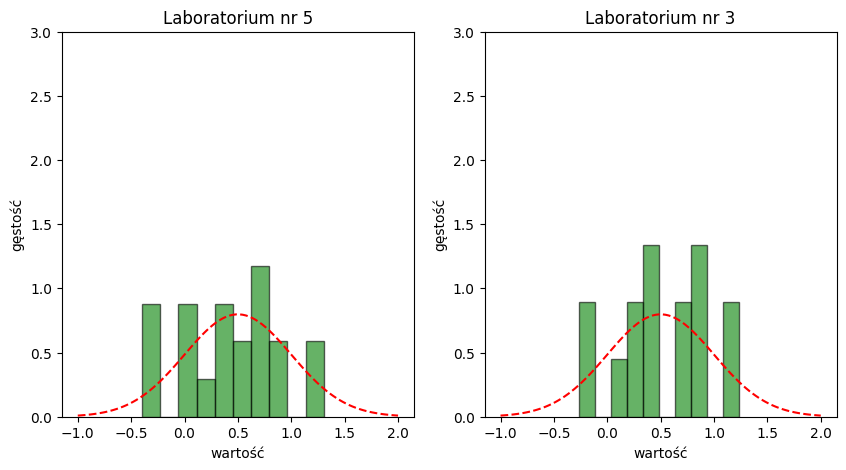

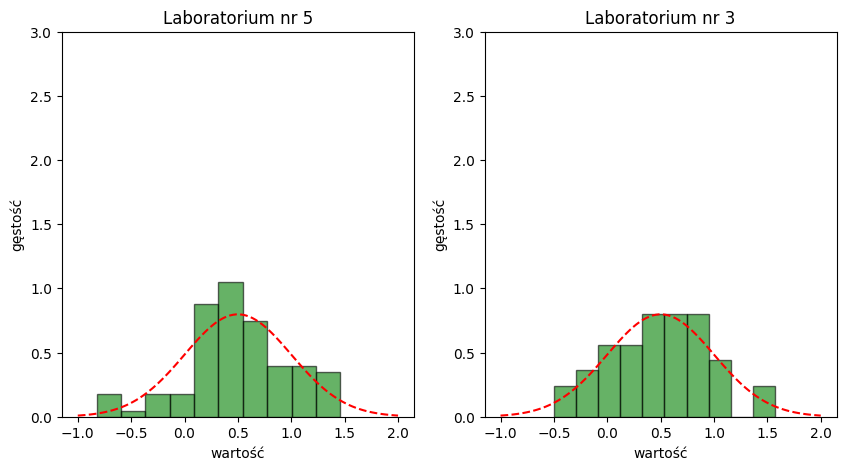

In [706]:
nakreśl_wykres(ciag_20,lab3_ciag_15)
nakreśl_wykres(ciag_100,lab3_ciag_120)

Wykresy rozkładu wartości dla większych prób są bliższe kształtem do krzywej dzwonowej. 

### e)

Pierwszym krokiem jaki wykonamy jest sprawdzenie czy próby są rozkładami normalnymi.

> H0: Próba ma rozkład normalny

> HA: Próba nie ma rozkładu normalnego

Użyjemy do tego testu Shapiro-Wilka, ponieważ próba spełania warunki:
- losowości próby
- wielkość próby poniżej 2000

In [707]:
print(shapiro(ciag_20))
print(shapiro(ciag_100))

ShapiroResult(statistic=0.9678540825843811, pvalue=0.7090715765953064)
ShapiroResult(statistic=0.9772700667381287, pvalue=0.08128704875707626)


Ciąg 20:
>Statystyka Shapiro-Wilka: 0.968

>Wartość p: 0.709

>Interpretacja: Wartość p jest znacznie większa od typowego poziomu istotności 0.05, co oznacza, że nie mamy podstaw do odrzucenia hipotezy zerowej. Rozkład jest normalny.



Ciąg 100:
>Statystyka Shapiro-Wilka: 0.977

>Wartość p: 0.081

>Interpretacja: Wartość p dla ciągu 100 elementów jest większa od 0.05, co oznacza brak podstaw do odrzucenia hipotezy zerowej. Rozkaład próby jest rozkładem normalnym.

Sprawdzamy teraz czy średnie z prób są równe 0,5.

> H0: Średnia z próby jest równa 0,5.

> HA: Średnia z próby jest różna od 0,5.

Dla sprawdzenia tej hipotezy użyjemy testu t-studenta, ponieważ próba spełnia warunki:
- normalność rozkładu
- losowość próby
- niezależnosć wyników

alfa = 5%

In [708]:
def t_test(sequence, expected_mean=0.5):
    sample_mean = np.mean(sequence)
    sample_std = np.std(sequence, ddof=1)
    n = len(sequence)
    
    
    t_stat = (sample_mean - expected_mean) / (sample_std / (n**(1/2)))
    p_value = 2 * stats.t.sf(np.abs(t_stat), n-1)
    
    return t_stat,p_value

t_stat_20, p_value_20 = t_test(ciag_20)
t_stat_100, p_value_100 = t_test(ciag_100)

In [709]:
v_20 = 2.086
v_100 = 1.984
alfa = 0.05

def decision(t,p,v,n):
    if abs(t) < abs(v) and p > alfa:
        print(f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby {n} jest równa 0.5')
    else:
        print(f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby {n} nie jest równa 0.5')

In [710]:
decision(t_stat_20,p_value_20,v_20,20)
decision(t_stat_100,p_value_100,v_100,100)

Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 20 jest równa 0.5
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 100 jest równa 0.5


Sprawdzenie czy średnie odpowiednich prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 3 są równe.

> H0: Średnie prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 3 są równe.

> HA: Średni prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 3 nie są równe.

Użyjemy do tego testu t-studenta dla dwóch niezależnych prób.

Wymagania:
- próby muszą miec rozkład normalny
- próby muszą być równoliczne
- muszą mieć stwierdzone czy ich wariancje są równe

W naszym przypadku wariancje są równe.

Próby nie są równoliczne, ale ponieważ wariancje są równe, to możemy wykonać test statystyczny.

In [711]:
def porownaj_srednie(proba1, proba2):
    

    mean1, mean2 = sum(proba1) / len(proba1), sum(proba2) / len(proba2)
    var1, var2 = sum((x - mean1) ** 2 for x in proba1) / (len(proba1) - 1), sum((x - mean2) ** 2 for x in proba2) / (len(proba2) - 1)
    pooled_var = ((len(proba1) - 1) * var1 + (len(proba2) - 1) * var2) / (len(proba1) + len(proba2) - 2)
    
    
    t_stat = (mean1 - mean2) / ((pooled_var * (1 / len(proba1) + 1 / len(proba2)))**(1/2))
    
    
    df = len(proba1) + len(proba2) - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

    return t_stat, p_value

In [712]:
t_stat_20, p_value_20 = porownaj_srednie(ciag_20,lab3_ciag_15)
t_stat_100, p_value_100 = porownaj_srednie(ciag_100,lab3_ciag_120)

print(porownaj_srednie(ciag_20,lab3_ciag_15))
print(porownaj_srednie(ciag_100,lab3_ciag_120))

(-0.6918499071166521, 0.4938709429643098)
(0.3236805312384254, 0.7464902174910799)


In [713]:
v_35 = 2.03
v_220 = 1.97


def decision(t,p,v):
    if abs(t) < abs(v) and p > alfa:
        print(f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnie z prób z laboratoriów są równe')
    else:
        print(f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnie z prób z laboratoriów nie są równe')

In [714]:
decision(t_stat_20,p_value_20,v_35)
decision(t_stat_100,p_value_100,v_220)

Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z prób z laboratoriów są równe
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z prób z laboratoriów są równe
